In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [45]:
train = pd.read_csv("train.csv")

In [5]:
test = pd.read_csv('test.csv')

In [6]:
train.drop('ID', axis=1, inplace=True)
train.fillna(-9999, inplace=True)

In [7]:
int_vars = list(train.select_dtypes(include=['int16', 'int32', 'int64']).columns)

In [8]:
float_vars = list(train.select_dtypes(include=['float16', 'float32', 'float64']).columns)

In [9]:
object_vars = list(train.select_dtypes(include=['object']).columns)

In [10]:
train[int_vars].describe()

,target,v38,v62,v72,v129
count,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000
mean,0.761199,0.090928,1.030694,1.431767,0.310144
std,0.426353,0.583478,0.696244,0.922267,0.693262
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,2.000000,0.000000
max,1.000000,12.000000,7.000000,12.000000,11.000000


In [11]:
train[float_vars].describe()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,...,v70,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
count,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,1.143210e+05,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,...,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,1.143210e+05,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000
mean,-4357.598400,-4351.156506,-4353.029991,-4247.837486,-4357.143892,-4357.117086,-4251.564047,-4355.086686,-5.465334,-4350.154719,-0.645797,-4356.375585,11.743999,-4357.694356,-4361.254026,-4353.206557,-4358.043840,-4359.355005,-4349.193070,-46.448485,-4.431642e+03,-4251.448208,-4357.460000,-4356.970682,-4355.645108,-4353.889001,-4357.603215,-4357.298890,-3.308516,-4353.936402,-4245.174897,-4359.062188,-4358.170277,0.747235,-4354.466567,-4351.227245,-4357.617820,-4349.276561,-4353.361103,-4251.487060,-4348.292861,-4353.996107,-6.018792,-4428.505783,-4350.005868,-4251.703538,-4357.638525,-4356.217956,-4354.523866,-4349.393522,...,-4246.861134,-4357.495582,-4354.012104,-4354.396159,-4356.513831,-4358.933964,-4248.673739,-4249.293705,-4357.292023,-4357.611222,-4431.291824,-4357.829966,-4250.425770,-4357.432837,-4251.551486,-4358.322728,-4359.151924,-4355.429701,-4356.344848,-4359.104891,-4354.875317,-4355.181200,-4251.081045,-4357.812740,-4352.047618,-4351.494027,-4486.722311,-4355.530376,-4357.027446,-4255.214329,-4348.714292,-4251.624420,-4250.458605,-4356.619889,10.946961,-4358.084134,-4357.575728,-4248.089481,-4354.762651,-4.430924e+03,-4358.139798,-4357.673893,-4356.332663,-4430.536763,-4251.895518,-4357.574724,-4356.690837,-4251.694672,-4358.394237,-4363.048286
std,4959.070247,4961.555106,4959.908851,4947.777174,4959.469736,4959.493299,4944.129020,4962.955200,270.996082,4965.966881,274.335818,4960.145174,59.234116,4959.338692,4961.412635,4959.753873,4958.678639,4958.496084,4967.165699,729.555063,4.967781e+03,4944.228727,4959.191858,4959.622015,4960.787629,4962.331020,4959.065966,4959.333520,311.625744,4962.289360,4950.067905,4958.753549,4958.920590,311.761702,4961.823273,4964.670796,4959.405969,4963.206367,4962.795216,4944.195284,4964.070555,4962.236820,274.189325,4970.843269,4966.097738,4944.008887,4959.034949,4960.283685,4962.128537,4963.103608,...,4949.679877,4959.513442,4959.046111,4961.885198,4965.584182,4959.571964,4947.057784,4946.524921,4959.339566,4959.058960,4968.709116,4958.866635,4949.002848,4959.215782,4944.139835,4958.786254,4958.674638,4960.976727,4960.172156,4958.715991,4961.463976,4962.165991,4947.641805,4958.

In [12]:
train[object_vars].nunique()

v3          4
v22     18211
v24         5
v30         8
v31         4
v47        10
v52        13
v56       123
v66         3
v71         9
v74         3
v75         4
v79        18
v91         8
v107        8
v110        3
v112       23
v113       37
v125       91
dtype: int64

In [13]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(train[float_vars], 0.9)

In [15]:
correlated_features = set(corr_features) 
print(len(correlated_features))

102


In [16]:
corr = train.drop('target', axis = 1).corr()

In [17]:
columns = []
sum_cor = []
for col in corr.columns:
    print(col, np.abs(corr[col]).sum(axis=0))
    columns.append(col)
    sum_cor.append(np.abs(corr[col]).sum(axis=0))
a_dict = dict(zip(columns, sum_cor))

v1 99.07837530301008
v2 99.06015857315957
v4 99.06012049823931
v5 96.02358250122457
v6 99.0783830566008
v7 99.07838584488292
v8 96.03076378486273
v9 99.0560067734118
v10 7.531554777549875
v11 99.07618806426407
v12 7.59837689918564
v13 99.07836097219268
v14 2.7398038440689882
v15 99.07616643625751
v16 98.98725401961707
v17 99.0601087264765
v18 99.07837615643948
v19 99.06771441290041
v20 99.0708644384477
v21 3.5348274819423557
v23 98.29472192064176
v25 96.03077512241659
v26 99.07838043471861
v27 99.07838410758949
v28 99.07834736728108
v29 99.07839488010833
v32 99.07837099081976
v33 99.07835875402833
v34 8.30157690379152
v35 99.07838638820479
v36 96.0226139138419
v37 99.06771097915441
v38 1.8242060296567533
v39 99.07619569849122
v40 8.451720567265976
v41 99.07838931160964
v42 99.07838366165436
v43 99.07617856250862
v44 99.06012353199398
v45 99.07837062097079
v46 96.03075232855952
v48 99.06003992358285
v49 99.07838343245447
v50 7.574755285124813
v51 98.29272306561853
v53 99.0761878732103
v

In [18]:
correlat = pd.DataFrame(data=a_dict.values(), index=a_dict.keys(), columns=['sum_corr'])

In [19]:
idx_good_corr = correlat.sort_values(by='sum_corr')[correlat['sum_corr'] < 30].index

<ipython-input-19-c73ce5807847>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_good_corr = correlat.sort_values(by='sum_corr')[correlat['sum_corr'] < 30].index


Сравню выбор столбцов с способом mutual_info

In [20]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [21]:
mi = mutual_info_classif(train[float_vars].fillna(0), train['target'])

In [22]:
mi

array([0.01433587, 0.02035912, 0.02079255, 0.01332395, 0.01886094,
       0.01956011, 0.01378291, 0.01593631, 0.02394292, 0.02038807,
       0.02181889, 0.01995967, 0.01984951, 0.01874757, 0.01377604,
       0.02034325, 0.01227889, 0.01753982, 0.01776577, 0.01560563,
       0.00999934, 0.01532004, 0.01763129, 0.01903853, 0.01318711,
       0.01854627, 0.01857557, 0.01775152, 0.01041192, 0.01718912,
       0.01098642, 0.0113373 , 0.01729033, 0.00690191, 0.01877556,
       0.02070892, 0.01634747, 0.02005259, 0.01963117, 0.01393022,
       0.02061165, 0.01922762, 0.04225146, 0.01936703, 0.01713737,
       0.01684034, 0.02043199, 0.01916528, 0.01630844, 0.01750534,
       0.02157206, 0.02016586, 0.01462899, 0.01941993, 0.01767447,
       0.02018574, 0.02051429, 0.01336871, 0.01525523, 0.01791557,
       0.0182205 , 0.01922421, 0.01369027, 0.01429676, 0.01331444,
       0.01189114, 0.01775112, 0.02062569, 0.01809967, 0.01879316,
       0.017695  , 0.01942209, 0.01553427, 0.02004892, 0.01675

In [23]:
mi = pd.Series(mi)
mi.index = train[float_vars].columns
mi_sort = mi.sort_values(ascending=False).head(10)

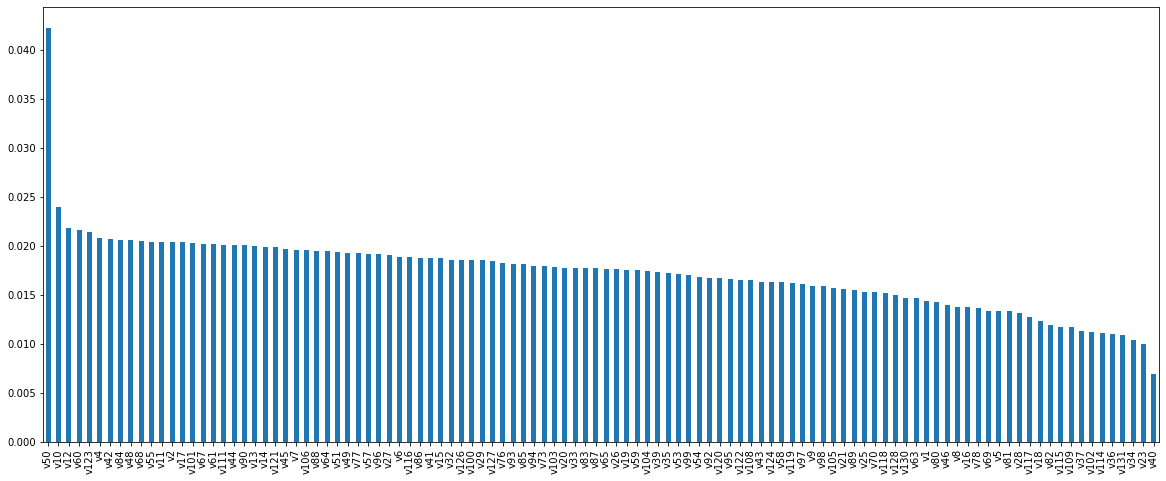

In [24]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [25]:
mi_idx = mi_sort.index

In [26]:
mi_cor_columns = list(set(list(mi_idx) + list(idx_good_corr)))

In [27]:
idx_good_corr

Index(['v38', 'v14', 'v21', 'v62', 'v129', 'v114', 'v72', 'v10', 'v50', 'v12',
       'v34', 'v40'],
      dtype='object')

In [28]:
mi_idx

Index(['v50', 'v10', 'v12', 'v60', 'v123', 'v4', 'v42', 'v84', 'v48', 'v68'], dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('target', axis=1), 
                                                    train['target'], 
                                                    test_size=0.3,
                                                    stratify=train['target'],
                                                    random_state=42)

In [31]:
categorical_features_ind = np.where(X_train.dtypes != np.float)[0]

In [32]:
import shap

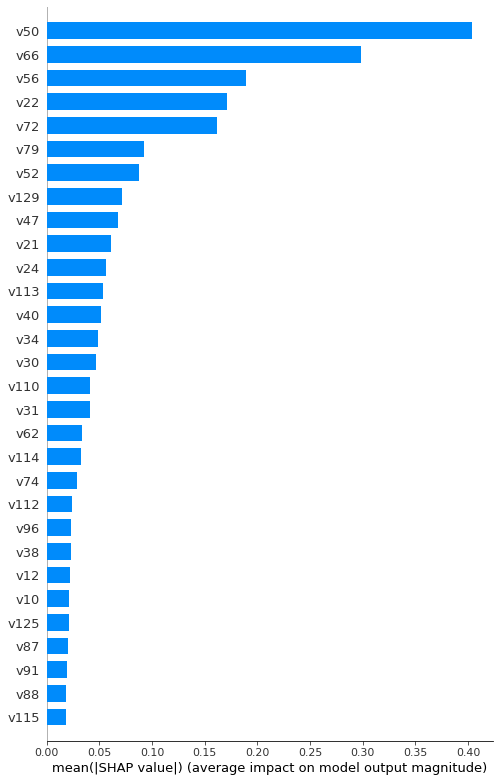

In [33]:
train_pool = Pool(X_train, y_train, cat_features=categorical_features_ind)
clf = CatBoostClassifier(learning_rate=0.08, 
                         iterations=1200,
                         random_strength=0.15,
                         random_seed=0, 
                         model_size_reg=0.1,
                         logging_level='Silent')
clf.fit(train_pool)
shap_all = clf.get_feature_importance(train_pool, 'ShapValues')
shap_values = shap_all[:, :-1]
shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=30)

In [34]:
idx_good_corr

Index(['v38', 'v14', 'v21', 'v62', 'v129', 'v114', 'v72', 'v10', 'v50', 'v12',
       'v34', 'v40'],
      dtype='object')

In [35]:
shap_columns =['v66', 'v56', 'v22', 'v79', 'v52', 'v47', 'v24', 'v113', 'v30', 'v110']

In [36]:
good_columns = shap_columns + list(idx_good_corr)

In [37]:
good_columns = ['v66', 'v56', 'v22', 'v79', 'v52', 'v47', 'v24', 'v113', 'v30', 'v110', 'v38', 'v14', 'v21', 'v62', 'v129', 'v114', 'v72', 'v10', 'v50', 'v12', 'v34', 'v40']

In [38]:
test_id = test['ID']

In [39]:
test = test.drop('ID', axis=1)

In [40]:
test = test.fillna(-9999)

In [55]:
train = train.fillna(-9999)

In [41]:
test = test[good_columns]

In [46]:
train_target = train['target']

In [47]:
train = train[good_columns]

In [48]:
X_train = X_train[good_columns]

In [49]:
X_test = X_test[good_columns]

In [50]:
cat_features_ids_train = np.where(train.dtypes != np.float)[0]

In [53]:
cat_features_ids_train

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 16],
      dtype=int64)

In [51]:
cb_model = CatBoostClassifier(learning_rate=0.06, 
                              iterations=1600,
                              random_strength=0.15,
                              model_size_reg=0.1,
                              random_seed=0, 
                              max_depth=6, 
                              l2_leaf_reg=42, 
                              border_count=240, 
                              bagging_temperature=1.8,
                              logging_level='Silent'
                             )

In [56]:
cb_model.fit(train, train_target,
    cat_features = cat_features_ids_train
)

In [57]:
proba = cb_model.predict_proba(test)[:, 1]

pd.DataFrame({'ID': test_id, 'PredictedProb': proba}).to_csv(
    'subm_improved8.csv', index=False)